<center><img src=img/MScAI_brand.png width=70%></center>

# Numpy example: Estimating Heart Rate

<center><img src=img/electrocardiogram-ekgchest.jpg width=30% hspace="40"/></center>

<font size=1>https://my.clevelandclinic.org/health/diagnostics/16953-electrocardiogram-ekg</font>

**Example**: suppose we are in a hospital setting. We are programming an *electrocardiogram* device, that is a device which measures the electrical activity near the heart at a rate of 360Hz. 

<center><img src=img/ECG-678x300.jpg width=50% hspace="40"/></center>
<font size=1>https://www.onlinebiologynotes.com/electrocardiogram-ecg-working-principle-normal-ecg-wave-application-of-ecg/</font>

The result is the familiar heart-beat signal. How can we calculate the *heart rate* in beats per minute (bpm)?

We'll answer this using basic signal-processing methods in Numpy. 

### Reading and extracting data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We'll use a sample data file downloaded from https://data.mendeley.com/datasets/7dybx7wyfn/3. (I have copied it to the `data/` directory in `W03.zip`.) 

It is in Matlab format, which we can load using the [input-output module of the Scipy library](https://docs.scipy.org/doc/scipy/reference/io.html).

In [2]:
import scipy.io as sio
m = sio.loadmat("data/ECG_MLII_1_NSR_100m_0.mat")

In [3]:
# let's inspect:
type(m)

dict

In [4]:
list(m.keys())

['val']

In [5]:
type(m['val'])

numpy.ndarray

In [6]:
# it seems m['val'] is what we want.
x = m['val']

In [7]:
# let's inspect further
x.shape

(1, 3600)

In [8]:
# we would prefer a simple 1D array
x = x.flatten()
x.shape

(3600,)

Now we are ready to take a look at the signal. It looks familiar, so we feel confident that everything is ok so far.

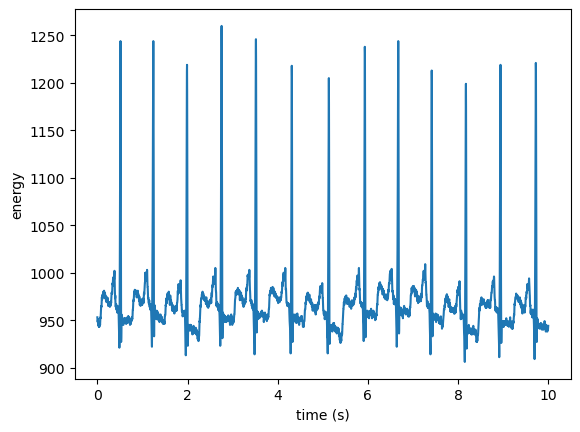

In [11]:
fs = 360 # sampling frequency in Hz, see https://data.mendeley.com/datasets/7dybx7wyfn/3
L = 10 # length of signal in seconds
t = np.linspace(0, L, fs*L)
plt.plot(t, x); plt.xlabel("time (s)"); plt.ylabel("energy");

### Signal processing to find heart rate: overall plan

* Find the *peaks*, one per heart-beat, as follows:
  * Apply a threshold to make signal binary, setting $x_t=1$ for any very high value and 0 otherwise
  * Take first differences, ie change from point to point
  * Find points where the first difference is positive, ie change from non-peak to peak
* Calculate how many peaks per unit time.

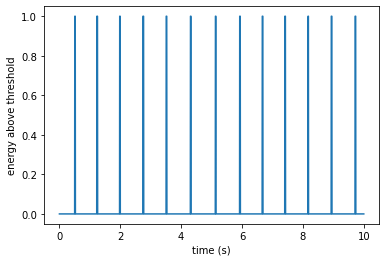

In [10]:
# apply a threshold and plot
xt = (x > 1050).astype(int) # xt = x thresholded, convert from bool to int
plt.plot(t, xt); plt.xlabel("time (s)"); plt.ylabel("energy above threshold");

Next we zoom in. Notice that each peak is *not* a single sample, but several successive ones.

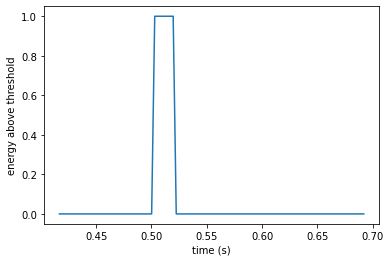

In [11]:
plt.plot(t[150:250], xt[150:250])
plt.xlabel("time (s)"); plt.ylabel("energy above threshold");

In [12]:
xt[150:250] # let's look at individual values in text form

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

The first differences will give us the locations where the signal *changes* from 0 to 1 or 1 to 0.

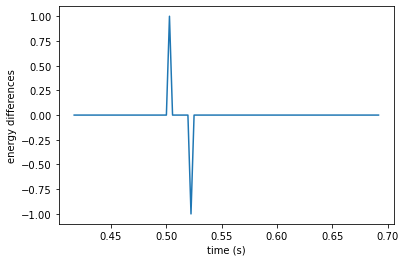

In [13]:
xtd = np.diff(xt, prepend=xt[0]) # xtd = x, thresholded, first differences
# we use prepend so that the output has same length as input. prepending the 
# initial value is common as it will not give a misleading large diff.
plt.plot(t[150:250], xtd[150:250])
plt.xlabel("time (s)"); plt.ylabel("energy differences");

We keep only the positive differences: where the original signal goes from "not very high" to "very high"


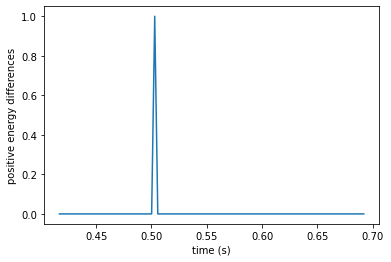

In [14]:
xtdp = xtd > 0 # x, thresholded, first differences, positive
plt.plot(t[150:250], xtdp[150:250])
plt.xlabel("time (s)"); plt.ylabel("positive energy differences");

Now each heart beat is represented by a single value 1 surrounded by zeros. The heart rate is just the number of these, divided by total time.

In [15]:
np.sum(xtdp) / L * 60 # heart rate in bpm

78.0